# Homework 6: Two-way ANOVA
***

**Name**: HARISH NANDHAN SHANMUGAM

***

This assignment is due on Gradescope by **Friday March 21 at 5:00PM**. If you submit the assignment  by this deadline, you will receive 2 bonus points. If you need a little extra time, you may submit your work by **Monday March 24 at 5:00PM**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified R code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**:

- There is 1 total question on this assignment.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked here. **All** of your written commentary, justifications and mathematical work should be in Markdown.
- Because you can technically evaluate notebook cells in a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected.
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.



---

## Problem 1 (100 points)

**PART A:** Load in the data set, `MathGender.csv`

This dataset comes from: https://www.stat.cmu.edu/~hseltman/309/Book/chapter11.pdf

Here is some information about this dataset:
"The data in MathGender.csv are from an observational study carried out to investigate the relationship between the ACT Math Usage Test and the explanatory gender (1=female, 2=male) and level of mathematics coursework taken (1=algebra only, 2=algebra+geometry, 3=through calculus) for 861 high school seniors. The outcome, ACT score, ranges from 0 to 36 with a median of 15 and a mean of 15.33. An analysis of these data ... can be called a 3x2 ANOVA because those are the numbers of levels of the two categorical explanatory variables."

Perform some EDA and answer the following questions. Explicitly, I would like you to provide/answer the following:

- Change the levels for each variable from 1,2 to `female`, `male` and 1,2,3 to `algebra`, `algebra+geometry`, `calculus` respectively. The built-in `factor()` function will be helpful here.

- Create a frequency table (cross-tabulation table) that shows the number of subjects in each math/gender category. Please have the rows be the number of math classes taken and the columns be the genders given. Please note that I am using the same categories and names that the dataset provides; we are bound by the definitions of the categories as they are given.

- Boxplots for both Math and Gender categories (there should be a total of 6).

- Is this a balanced design experiment? Or an unbalanced design experiment?

In [1]:
data = read.csv('/content/MathGender.csv')
head(data)

,score,courses,gender
,<int>,<int>,<int>
1,5,1,2
2,13,1,2
3,7,1,2
4,20,1,2
5,11,1,2
6,16,1,2


In [2]:
data$gender = factor(data$gender, levels = c(1,2), labels = c("female", "male"))
data$courses = factor(data$courses, levels=c(1,2,3),labels=c("algebra","algebra+geometry","calculus"))

In [3]:
table(data$courses, data$gender)

                  
                   female male
  algebra              82   48
  algebra+geometry    387  223
  calculus             54   67

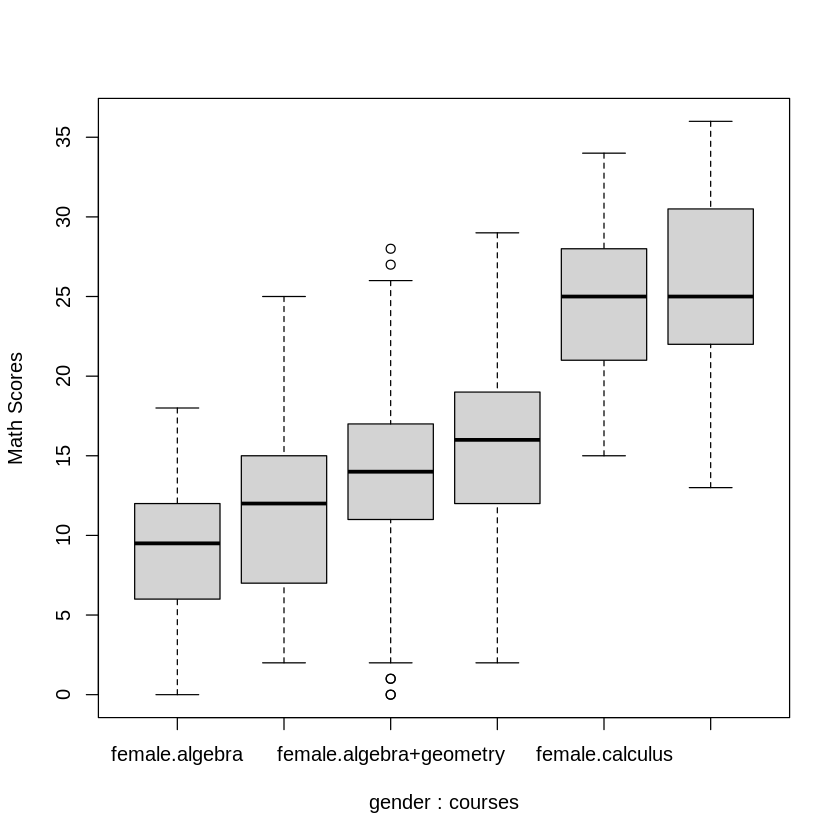

In [4]:
boxplot(score~gender+courses, data = data, ylab = "Math Scores")

- An unbalanced design experiment.
- Because in a balanced design experiment, each group should have an equal no. of observations so that all the box sizes appears similar and it will show the similar distribution ranges. Here by this plot the spread of the data range vary for course & gender that is shown by the mean & whiskers of the box plot.

**PART B:**

- Make an interaction plot (aka profile plot). Specify that `courses` is the x factor and `gender` is the trace factor.

- Compute the mean and the confidence interval of the mean by groups and summarize this information in a table

- Based on the interaction plot and the confidence intervals in the table, do you think an additive model or an interaction model is the best way of proceeding? Why?

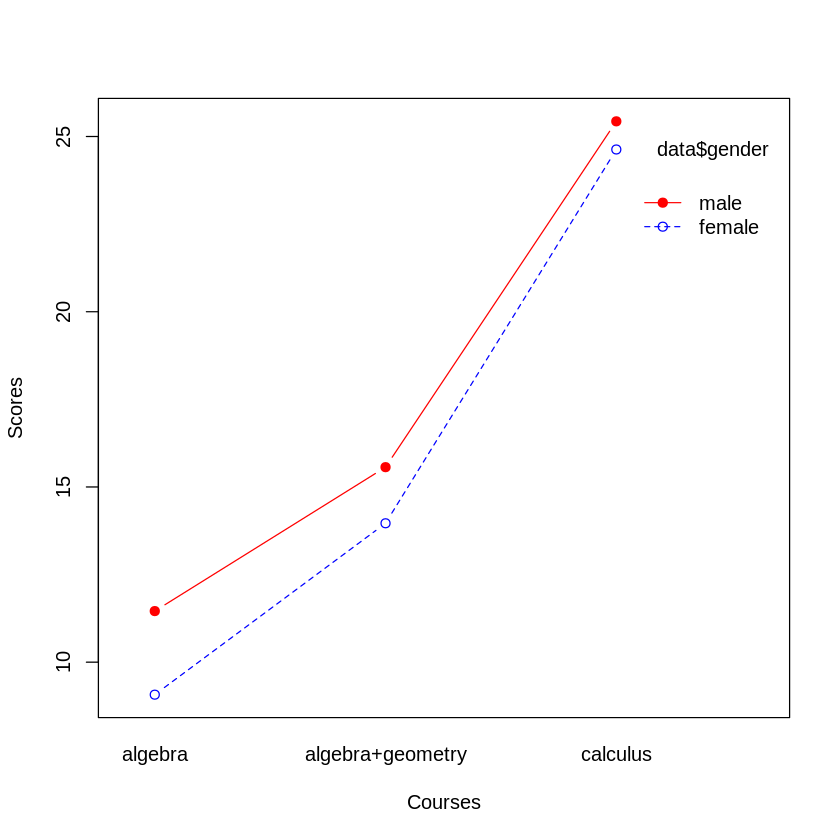

In [5]:
interaction.plot(x.factor = data$courses, trace.factor = data$gender,
                  response = data$score, fun = mean,
                  type = "b", legend = TRUE,
                 xlab = "Courses", ylab="Scores",
                 pch=c(1,19), col = c("blue", "red"))

In [6]:
install.packages("dplyr")
library(dplyr)
group_by(data, courses, gender) %>%
  summarise(count = n(), mean = mean(score, na.rm=TRUE), LowerBound = t.test(score)$conf.int[1], UpperBound = t.test(score)$conf.int[2])

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


`summarise()` has grouped output by 'courses'. You can override using the
`.groups` argument.


courses,gender,count,mean,LowerBound,UpperBound
<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>
algebra,female,82,9.073171,8.153331,9.993011
algebra,male,48,11.458333,9.981422,12.935244
algebra+geometry,female,387,13.963824,13.464014,14.463634
algebra+geometry,male,223,15.565022,14.919921,16.210124
calculus,female,54,24.629630,23.305888,25.953372
calculus,male,67,25.432836,24.077925,26.787746


interaction plot:
- The interaction plot here have courses in x axis & scores in y axis.
- red line (solid line) : males , blue line (dashed line) : females
- Here the gap exists between the male and female scores eeps on increasing for the successive math courses ie. for algebra+geometry, calculus and all. (Males score more than the females)
- The effect of course type depends on gender and the scores changes based on this.

Confidence Interval Table:
- The Confidence interval shows there is a significant differences in scores for males and females in all the courses, the mean score difference widens starting from algebra to calculus (in calculus we have there is an overlap).
- The interaction model is the best way of proceeding here because the non parallel lines are indicating there exists a relationship between the courses and the scores on each course directly depends on the gender.

**PART C:** Perform a two-way ANOVA with interaction on the dataset. Please use the `aov()` function to do this and print out the ANOVA table (this is the table with the various sums of squares, degrees of freedom, F-statistics, and p-values).

- What are the three hypotheses that we should test with this table?

- Based on the ANOVA results, what are the conclusions of each of these three hypothesis tests?

In [7]:
result.aov2.interactive = aov(score~courses  + gender + courses : gender, data = data)
summary(result.aov2.interactive)

                Df Sum Sq Mean Sq F value   Pr(>F)    
courses          2  15619    7809 319.826  < 2e-16 ***
gender           1    517     517  21.158 4.87e-06 ***
courses:gender   2     38      19   0.771    0.463    
Residuals      855  20877      24                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Null Hypothesis:
1. There is no difference in the means of factor A (courses).
2. There is no difference in means of factor B (gender).
3. There is no interaction between factors A and  (Both courses and gender)

The alternative hypothesis for cases 1 and 2: the means are not equal.

The alternative hypothesis for case 3 is: there is an interaction between A and B.

From the output above, the two main effects, courses and gender are statistically significant. Additionally, their interaction is also statistically significant.

- Since the p-value for `courses` is <2e-16 (significant), this indicates that the levels of `courses`, (`algebra`,`algebra+geometry`,`calculus`) are associated with significantly different score. [Reject H0]

- Since the p-value for `gender` is 4.87e-06 (significant), this indicates that the levels of `gender`, (`female`,`male`) are associated with significantly different scores.[Reject H0]

- Since the p-value for the interaction between `courses*gender` is 0.463 (significant), this indicates that the relationships between `courses` and `score` depends on the `gender`. [Fail  to reject H0]

**PART D:** Remove the interaction and re-do the two-way ANOVA. Print out the ANOVA table again as you did in Part C.

- What is different in this additive (non-interaction) model?

In [8]:
result.aov2.additive = aov(score ~ courses + gender, data = data)
summary(result.aov2.additive)

             Df Sum Sq Mean Sq F value   Pr(>F)    
courses       2  15619    7809  320.00  < 2e-16 ***
gender        1    517     517   21.17 4.84e-06 ***
Residuals   857  20914      24                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

- The additive model assumes that the courses and gender affects the scores independently, but that's not true.
- Here in this model, removes the interaction term ie. courses : gender which reduces the degrees of freedom and as a result it redistributes the variance among the courses and gender.
- Here the F value of gender is slightly increased compared to the interaction model which is suggesting gender contributes to the main effect but this is not true because in interaction model it's variance is explained by the interaction term and here there's no interaction term.

**PART E:** Use diagnostic tools to determine whether the error in the interaction model satisfies the constant variance assumption and the normality assumption. Justify your findings with both a plot and a formal test.

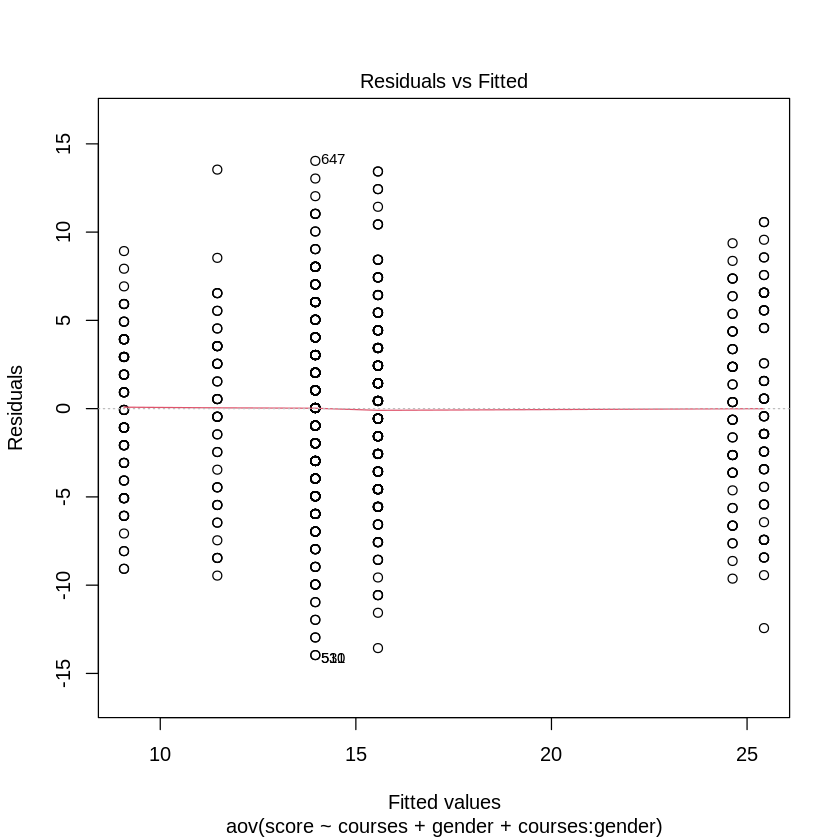

In [9]:
plot(result.aov2.interactive,1)

- The residuals vs fitted plot shows that the residuals spread is slightly constant at some fitted values and more spread at some fitted values. (ie.there is high variance in some areas)
- Some outliers are present but there is no clear evidence for the heteroscedasticity.
- Homogenity of variances is reasonably satisfied as the distribution doesn't show any increasing or decreasing trends.


In [11]:
source("/content/leveneTest.r")
leveneTest(score~courses*gender,data=data)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,5,0.9617275,0.4403204
,855,NA,NA


- p value > 0.05, so fail to reject the null hypothesis (ie.Have constant variance) [satisfies the assumption of homoscedasticity]

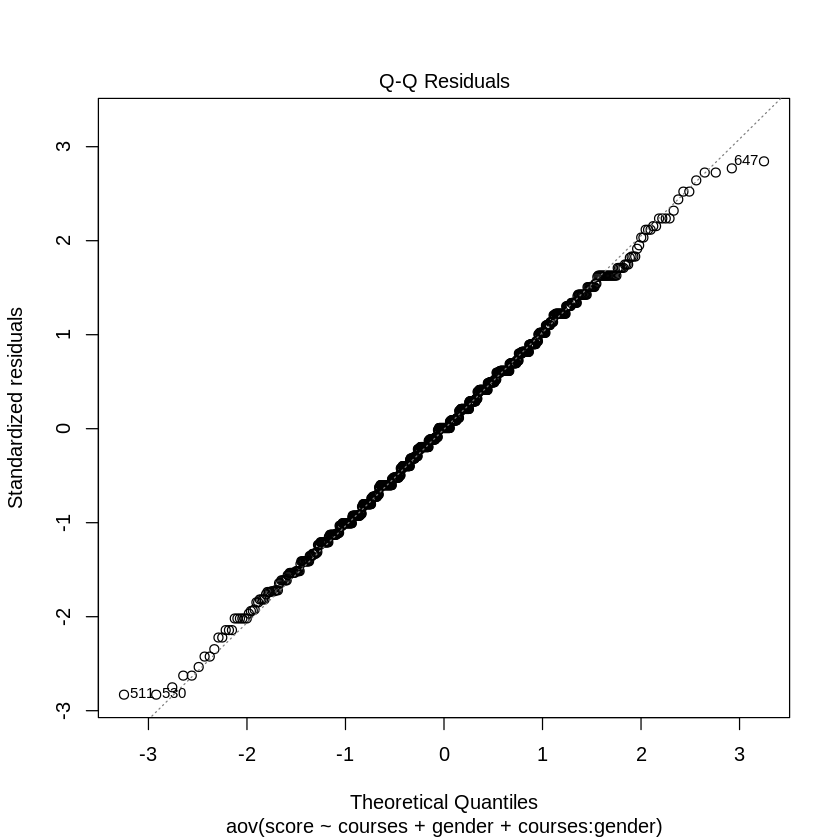

In [12]:
plot(result.aov2.interactive, 2)

- The points here closely follow the diagonal line and there's no significant deviations to show non normality so based on this Q-Q plot the residuals are approximately normally distributed.

In [13]:
aov_residuals = residuals(object = result.aov2.interactive)
shapiro.test(x=aov_residuals)


	Shapiro-Wilk normality test

data:  aov_residuals
W = 0.9981, p-value = 0.4577


- Here p value > 0.05, fail to reject the null hypothesis (ie. Residuals are normally distributed)
- The residuals do not significantly deviate from the normal distribution.